# Jupiter Notebook for Groupwork in AA 2024

## Import Libraries

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import timedelta
import json
import numpy as np
import pickle

from fontTools.subset import subset

## 1 Load and Explore Data:

In [4]:
# Load csv-files independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data = pd.read_csv(os.path.join('Data', 'charging_sessions.csv'))
weather_data = pd.read_csv(os.path.join('Data', 'weather_burbank_airport.csv'))

charging_data = charging_data.rename(columns={'Unnamed: 0': 'counter'})
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   counter           66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [6]:
# How do the charging data records look like?
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [7]:
# How do the weather data records look like?
weather_data.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [8]:
# .describe() function only analyses numerical columns
charging_data.describe()

,counter,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [9]:
# .describe() function only analyses numerical columns
weather_data.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
std,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100
min,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000


## 2 Data Preparation

### 2.1 Identifying duplicates
To find duplicate entries in the charging_data DataFrame, we used Pandas' standard duplicate detection functions. Given the expectation of unique sessionID values for each charging session, this column was designated as the key for duplicate identification.

This process revealed 1413 duplicated rows, differing solely in the counter column. We then removed these redundant rows to ensure data integrity and prevent analytical bias.

In [10]:
charging_data_duplicates = charging_data.duplicated(subset='sessionID').sum()
weather_data_duplicates = weather_data.duplicated().sum()
# Display number of duplicate rows (if any)
print("Duplicate rows:\n charging data -> {}\n weather data -> {}".format(charging_data_duplicates,
                                                                          weather_data_duplicates))

Duplicate rows:
 charging data -> 1413
 weather data -> 0


In [11]:
charging_data[charging_data.duplicated(keep=False, subset='sessionID')].sort_values(by='id', ascending=True)

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
5573,0,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46+00:00,2019-07-02 02:34:56+00:00,2019-07-02 01:46:09+00:00,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,"[{'WhPerMile': 200, 'kWhRequested': 4.0, 'mile..."
65037,8675,5d2fbdd3f9af8b4d0dd0d54f,2019-07-02 00:32:46+00:00,2019-07-02 02:34:56+00:00,2019-07-02 01:46:09+00:00,2.463,1_1_193_827_2019-07-02 00:32:45.820079,1,AG-1F02,1-1-193-827,America/Los_Angeles,1117.0,"[{'WhPerMile': 200, 'kWhRequested': 4.0, 'mile..."
65038,8676,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28+00:00,2019-07-02 16:01:01+00:00,2019-07-02 16:01:38+00:00,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,"[{'WhPerMile': 273, 'kWhRequested': 19.11, 'mi..."
5574,1,5d310f54f9af8b52adda3e20,2019-07-02 12:15:28+00:00,2019-07-02 16:01:01+00:00,2019-07-02 16:01:38+00:00,12.891,1_1_194_818_2019-07-02 12:15:28.503952,1,AG-1F14,1-1-194-818,America/Los_Angeles,2834.0,"[{'WhPerMile': 273, 'kWhRequested': 19.11, 'mi..."
5575,2,5d310f54f9af8b52adda3e21,2019-07-02 12:42:49+00:00,2019-07-02 19:34:19+00:00,2019-07-02 16:21:21+00:00,13.734,1_1_178_828_2019-07-02 12:42:48.733464,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,1410,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
6984,1411,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
6985,1412,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [12]:
charging_data.drop_duplicates(subset='sessionID', keep='first', inplace=True)

### 2.2 Transform Datatypes
Format the datatypes of the columns to those described in the Team Assignment PDF

In [13]:
# Charging Data
# Ist eine explizite Zuweisung des datatypes "string" notwendig bei columns die schon "object" als datatype haben?
charging_data['connectionTime'] = pd.to_datetime(charging_data['connectionTime'])
charging_data['disconnectTime'] = pd.to_datetime(charging_data['disconnectTime'])
charging_data['doneChargingTime'] = pd.to_datetime(charging_data['doneChargingTime'])
charging_data['siteID'] = charging_data['siteID'].astype(str)
#charging_data['userID'] = charging_data['userID'].astype(str) --> ggf erst nach den missing data korrigeren, da dann kein nan/none eingefügt wird
charging_data['userInputs'] = charging_data['userInputs'].astype(str)

# Team Assignment PDF: "All datetimes are in UTC (GMT) see timezone field for the correct timezone of the site."
# -> Therefore we have to convert the connectionTime, disconnectTime and doneChargingTime to timezone PST (pacific standard time) as the sites are located in Los Angeles.
charging_data['connectionTime'] = charging_data['connectionTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['disconnectTime'] = charging_data['disconnectTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['doneChargingTime'] = charging_data['doneChargingTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           65037 non-null  int64                              
 1   id                65037 non-null  object                             
 2   connectionTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  60950 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      65037 non-null  float64                            
 6   sessionID         65037 non-null  object                             
 7   siteID            65037 non-null  object                             
 8   spaceID           65037 non-null  object                             
 9   stationID         65037 non-null  object                          

In [14]:
# The offset of the columns connectionTime, disconnectTime and doneChargingTime is now -08:00 or -07:00 (summer) which is correct for timezone PST (Los Angeles)
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [15]:
# Additionally we localize the weather data, so that the datetime columns in both datasets have the same timezone
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])
weather_data['timestamp'] = weather_data['timestamp'].dt.tz_localize(tz='America/Los_Angeles', nonexistent='shift_forward', ambiguous='NaT')
weather_data.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00-08:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00-08:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00-08:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00-08:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00-08:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [16]:
# While performing the timezone localize to the weather data, we faced an AmbiguousTimeError which occurs because of an issue with converting timezone-aware datetime values.
# For example, during the transition from DST (Daylight Saving Time) to standard time, an hour gets repeated, making times like 2018-11-04 01:53:00 ambiguous (it could occur in either DST or standard time).
# Therefore, we decided to use the parameters nonexistent='shift_forward' and ambiguous='NaT' of the function tz_localize which deals with this issue. It replaced 3 timestamps with 'NaT' (Not a Time) which we will drop from the weather dataset.
nat_records = weather_data[pd.isna(weather_data['timestamp'])]
nat_records

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
8077,Burbank,NaT,26.0,33.0,Fair,985.49,7.0,0.0,26.0
18030,Burbank,NaT,23.0,27.0,Mostly Cloudy,986.81,7.0,0.0,23.0
27704,Burbank,NaT,25.0,33.0,Fair,987.80,9.0,0.0,26.0


In [17]:
# Drop 3 NaT records
print(f"Number of rows in weather dataset before drop: {weather_data.shape[0]}")
weather_data = weather_data.dropna(subset=['timestamp'])
print(f"Number of rows in weather dataset after drop: {weather_data.shape[0]}")
# Initially 29244 and now 29241 -> correct

Number of rows in weather dataset before drop: 29244
Number of rows in weather dataset after drop: 29241


In [18]:
'''
# Transforming the json-Strings in the userInputs column to Dataframes
# Notice: Takes about 1-2 minutes
def parse_json_to_dataframe(json_string):
    if json_string is not None and json_string != '' and json_string != 'nan':
        cleaned_json = json_string.replace("'", '"')
        cleaned_json = cleaned_json.replace("True", '"True"')
        cleaned_json = cleaned_json.replace("False", '"False"')
        data = json.loads(cleaned_json)
        dataframe = pd.DataFrame(data)
        #might as well just transform the date columns to the correct datatypes
        dataframe['modifiedAt'] = pd.to_datetime(dataframe['modifiedAt'], format='%a, %d %b %Y %H:%M:%S %Z')
        dataframe['modifiedAt'] = dataframe['modifiedAt'].dt.tz_convert(tz='America/Los_Angeles')
        dataframe['requestedDeparture'] = pd.to_datetime(dataframe['requestedDeparture'], format='%a, %d %b %Y %H:%M:%S %Z')
        dataframe['requestedDeparture'] = dataframe['requestedDeparture'].dt.tz_convert(tz='America/Los_Angeles')
        return dataframe
    else:
        return None


charging_data['userInputs'] = charging_data['userInputs'].apply(parse_json_to_dataframe)

'''

'\n# Transforming the json-Strings in the userInputs column to Dataframes\n# Notice: Takes about 1-2 minutes\ndef parse_json_to_dataframe(json_string):\n    if json_string is not None and json_string != \'\' and json_string != \'nan\':\n        cleaned_json = json_string.replace("\'", \'"\')\n        cleaned_json = cleaned_json.replace("True", \'"True"\')\n        cleaned_json = cleaned_json.replace("False", \'"False"\')\n        data = json.loads(cleaned_json)\n        dataframe = pd.DataFrame(data)\n        #might as well just transform the date columns to the correct datatypes\n        dataframe[\'modifiedAt\'] = pd.to_datetime(dataframe[\'modifiedAt\'], format=\'%a, %d %b %Y %H:%M:%S %Z\')\n        dataframe[\'modifiedAt\'] = dataframe[\'modifiedAt\'].dt.tz_convert(tz=\'America/Los_Angeles\')\n        dataframe[\'requestedDeparture\'] = pd.to_datetime(dataframe[\'requestedDeparture\'], format=\'%a, %d %b %Y %H:%M:%S %Z\')\n        dataframe[\'requestedDeparture\'] = dataframe[\'req

In [19]:
# check inner Dataframe
dftest = charging_data['userInputs']
dftest[3]

"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"

### 2.3 Identifying missing data

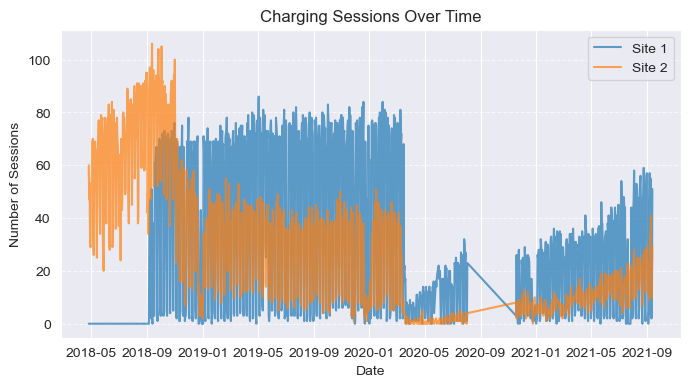

In [50]:
# First visualization of both datasets

# Extract date for grouping
charging_data['connection_date'] = charging_data['connectionTime'].dt.date

# Aggregate charging sessions per day
charging_sessions_per_day = charging_data.groupby(['connection_date', 'siteID']).size().unstack(fill_value=0)

# Plot charging sessions over time
plt.figure(figsize=(8, 4))
for siteID in charging_sessions_per_day.columns:
    charging_sessions_per_day[siteID].plot(label=f'Site {siteID}', alpha=0.7)
plt.title('Charging Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
# Add a column for month and year
charging_data['year_month'] = charging_data['connectionTime'].dt.to_period('M')

# Group by month and count records
monthly_counts = charging_data.groupby('year_month').size()

# Display the counts for visual inspection
monthly_counts

C:\Users\micro\AppData\Local\Temp\ipykernel_47412\2793028265.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  charging_data['year_month'] = charging_data['connectionTime'].dt.to_period('M')


year_month
2018-04     270
2018-05    1776
2018-06    1845
2018-07    2053
2018-08    2430
2018-09    3190
2018-10    3980
2018-11    2593
2018-12    1930
2019-01    2360
2019-02    2222
2019-03    2353
2019-04    2559
2019-05    2608
2019-06    2267
2019-07    2309
2019-08    2369
2019-09    2250
2019-10    2602
2019-11    2123
2019-12    1997
2020-01    2300
2020-02    2249
2020-03    1216
2020-04     225
2020-05     268
2020-06     411
2020-07     552
2020-08      30
2020-11     209
2020-12     581
2021-01     679
2021-02     747
2021-03     915
2021-04     971
2021-05    1006
2021-06    1246
2021-07    1035
2021-08    1628
2021-09     683
Freq: M, dtype: int64

Observations: </br>
- Notably more charging sessions in 2018 and 2019, especially in summer months (pre-covid)
- Much less charging sessions during covid pandemic (started in march 2020)
- Did not reach old levels after pandemic start

In [53]:
# Identify the first element (connectionTime) per site
first_element_per_site = charging_data.groupby('siteID')['connectionTime'].min()
first_element_per_site
#display(sorted_charging_data.head(1))
#display(sorted_charging_data.tail(1))

siteID
1   2018-09-05 04:04:13-07:00
2   2018-04-25 04:08:04-07:00
Name: connectionTime, dtype: datetime64[ns, America/Los_Angeles]

In [54]:
# Identify the last element (connectionTime) per site
last_element_per_site = charging_data.groupby('siteID')['connectionTime'].max()
last_element_per_site

siteID
1   2021-09-13 22:43:39-07:00
2   2021-09-13 18:52:37-07:00
Name: connectionTime, dtype: datetime64[ns, America/Los_Angeles]

Observations:
- Charging data ranges from 25-04-2018 (site 2) & 05-09-2018 (site 1) to 13-09-2021 (both sites)
- Data for site 1 starts 133 days after site 2
- Area with missing data between approx. August 2020 and December 2020

In [57]:
# Filter data between August 2020 and December 2020
filtered_data = charging_data[
    (charging_data['connectionTime'] >= '2020-08-01') &
    (charging_data['connectionTime'] <= '2020-12-01')
].copy()

# Group by date and get the last record for each date
last_records_per_date = filtered_data.groupby(['siteID', 'connection_date']).tail(1)

# Display the result
last_records_per_date

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connection_date
5024,5024,5f3b210cf9af8b0a6d10cbf3,2020-08-01 10:58:21-07:00,2020-08-01 16:11:54-07:00,2020-08-01 13:56:04-07:00,8.599,1_1_191_792_2020-08-01 17:58:21.088227,1,AG-4F37,1-1-191-792,America/Los_Angeles,76.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",2020-08-01
5025,5025,5f3c728df9af8b0c7b9c8a8a,2020-08-02 10:49:33-07:00,2020-08-02 15:56:36-07:00,2020-08-02 13:51:52-07:00,8.812,1_1_191_792_2020-08-02 17:49:33.364151,1,AG-4F37,1-1-191-792,America/Los_Angeles,76.0,"[{'WhPerMile': 350, 'kWhRequested': 35.0, 'mil...",2020-08-02
5048,5048,5f3dc41bf9af8b0e903d4335,2020-08-03 14:43:29-07:00,2020-08-03 17:30:15-07:00,2020-08-03 17:30:10-07:00,5.516,1_1_193_827_2020-08-03 21:43:29.408907,1,AG-1F02,1-1-193-827,America/Los_Angeles,405.0,"[{'WhPerMile': 370, 'kWhRequested': 11.1, 'mil...",2020-08-03
5051,5051,5fdd5806f9af8b16e6675e23,2020-11-18 23:04:36-08:00,2020-11-19 01:02:41-08:00,2020-11-19 00:47:26-08:00,5.293,1_1_178_823_2020-11-19 07:04:35.937413,1,AG-1F08,1-1-178-823,America/Los_Angeles,405.0,"[{'WhPerMile': 370, 'kWhRequested': 11.1, 'mil...",2020-11-18
5077,5077,5fdd5806f9af8b16e6675e3c,2020-11-19 15:14:30-08:00,2020-11-19 17:19:36-08:00,2020-11-19 17:06:16-08:00,6.306,1_1_191_792_2020-11-19 23:14:30.011951,1,AG-4F37,1-1-191-792,America/Los_Angeles,5015.0,"[{'WhPerMile': 290, 'kWhRequested': 11.6, 'mil...",2020-11-19
5086,5086,5fdd5813f9af8b16e6675e47,2020-11-20 13:23:21-08:00,2020-11-20 15:51:59-08:00,2020-11-20 14:58:11-08:00,4.564,1_1_193_819_2020-11-20 21:23:06.347775,1,AG-1F06,1-1-193-819,America/Los_Angeles,6779.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",2020-11-20
5089,5089,5fdd5817f9af8b16e6675e4a,2020-11-21 09:58:18-08:00,2020-11-21 14:16:48-08:00,2020-11-21 12:29:56-08:00,13.963,1_1_193_819_2020-11-21 17:58:12.192125,1,AG-1F06,1-1-193-819,America/Los_Angeles,5065.0,"[{'WhPerMile': 310, 'kWhRequested': 18.6, 'mil...",2020-11-21
5112,5112,5fdd5835f9af8b16e6675e61,2020-11-23 23:01:08-08:00,2020-11-24 01:03:53-08:00,2020-11-24 00:38:08-08:00,4.946,1_1_178_823_2020-11-24 07:01:08.151837,1,AG-1F08,1-1-178-823,America/Los_Angeles,405.0,"[{'WhPerMile': 370, 'kWhRequested': 11.1, 'mil...",2020-11-23
5140,5140,5fdd5843f9af8b16e6675e7d,2020-11-24 23:00:44-08:00,2020-11-25 01:00:00-08:00,2020-11-25 00:41:16-08:00,5.259,1_1_178_823_2020-11-25 07:00:43.763606,1,AG-1F08,1-1-178-823,America/Los_Angeles,405.0,"[{'WhPerMile': 370, 'kWhRequested': 11.1, 'mil...",2020-11-24
5154,5154,5fdd5843f9af8b16e6675e8b,2020-11-25 19:46:04-08:00,2020-11-25 21:34:06-08:00,2020-11-25 21:28:10-08:00,5.179,1_1_178_823_2020-11-26 03:46:04.043911,1,AG-1F08,1-1-178-823,America/Los_Angeles,405.0,"[{'WhPerMile': 370, 'kWhRequested': 11.1, 'mil...",2020-11-25


Final observation after looking at the filtered dataset: There is no charging data between 3rd August 2020 and 18th November 2020 for both sites.

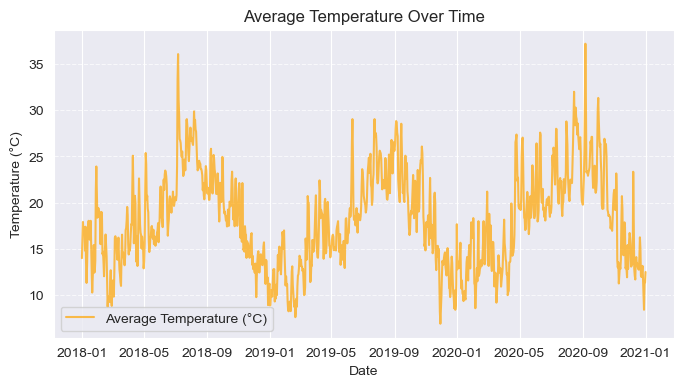

In [22]:
# Plot average temperature over time
weather_data['weather_date'] = weather_data['timestamp'].dt.date

average_temperature_per_day = weather_data.groupby('weather_date')['temperature'].mean()

plt.figure(figsize=(8, 4))
average_temperature_per_day.plot(label='Average Temperature (°C)', color='orange', alpha=0.7)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
sorted_weather_data = weather_data.sort_values(by='timestamp')
display(sorted_weather_data.head(1))
display(sorted_weather_data.tail(1))

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,weather_date
0,Burbank,2018-01-01 08:53:00-08:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0,2018-01-01


,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,weather_date
29243,Burbank,2021-01-01 07:53:00-08:00,10.0,33.0,Fair,987.8,6.0,0.0,10.0,2021-01-01


Observations:
- Weather data ranges from 01-01-2018 to 01-01-2021
- no area missing inbetween

In [24]:
# Identify missing data
charging_missing_data = charging_data.isnull().sum()
display(charging_missing_data[charging_missing_data > 0])

weather_missing_data = weather_data.isnull().sum()
display(weather_missing_data[weather_missing_data > 0])
print("Number of unique lines with missing values: " + str(weather_data.isnull().any(axis=1).sum()))

doneChargingTime     4087
userID              17215
dtype: int64

temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
felt_temperature           26
dtype: int64

Number of unique lines with missing values: 139


**Lets look at the missing values**<br>
For `charging_data`:
- `doneChargingTime`: We have 4088 missing values, that is 4088/66450=6,15% of the data set. Because we do not want to lose 6% of the data, we will replace the missing values with connectionTime + median charging time.
- `userID`: We have 17263 missing values, that is 17263/66450=25,98% of the data set. We will replace them with null values (0.0).
- `userInput`: We have 17263 missing values, that is 17263/66450=25,98% of the data set (see userID). We will replace them with null values (Null).

For `weather_data`:
- There are 139 lines with missing values through the data set. Because this is only 0,47%, we decided to drop these records.

### 2.4 Handling missing data

In [25]:
## charging data
# Calculate median charging time in seconds and round it
# should we explain why we use the median instead of mean?
median_charging_time = (charging_data['doneChargingTime'] - charging_data['connectionTime']).dt.total_seconds().median()
median_charging_time = round(median_charging_time)  # Round the median charging time
print(f"The median charging time is {median_charging_time} seconds, which is {median_charging_time / 60} minutes.")

# Make a copy to avoid modifying the original DataFrame
charging_data_cleaned = charging_data.copy()

# Fill 'doneChargingTime' NaNs with 'connectionTime' + median charging time
charging_data_cleaned['doneChargingTime'] = charging_data_cleaned['doneChargingTime'].fillna(
    charging_data_cleaned['connectionTime'] + pd.to_timedelta(median_charging_time, unit='s'))

# Fill userID with empty String values -> Change if type changed
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].fillna('')


# --> vielleicht: Transform Data type for userID erst nach den missing Data korrigieren

display(charging_data_cleaned['userID'].info())
charging_data_cleaned['userID'] = charging_data['userID'].fillna(0)
#display(charging_data_cleaned['userID'].head(12))
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(int)
display(charging_data_cleaned['userID'].head(12))
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(str)
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].replace('0', 'null')

display(charging_data_cleaned['userID'].head(12))
checkForValues = charging_data_cleaned[charging_data_cleaned['userID'] == 'null'].shape[0]
print("Amount of null-Values should be equal to 17263 missing userIDs, amount of null-values: ", checkForValues) 


## weather data
# Make a copy to avoid modifying the original DataFrame
weather_data_cleaned = weather_data.copy()

# Drop lines with missing values
weather_data_cleaned = weather_data_cleaned.dropna()

The median charging time is 9933 seconds, which is 165.55 minutes.
<class 'pandas.core.series.Series'>
Index: 65037 entries, 0 to 65036
Series name: userID
Non-Null Count  Dtype 
--------------  ----- 
65037 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


None

0      194
1     4275
2      344
3     1117
4      334
5     3519
6      933
7     3737
8      419
9      651
10    2020
11       0
Name: userID, dtype: int64

0      194
1     4275
2      344
3     1117
4      334
5     3519
6      933
7     3737
8      419
9      651
10    2020
11    null
Name: userID, dtype: object

Amount of null-Values should be equal to 17263 missing userIDs, amount of null-values:  17215


## 3 Erroneous Data

In [26]:
# Check whether disconnectTime is before connectionTime
erroneous_disconnect_times = charging_data_cleaned[charging_data_cleaned['disconnectTime'] < charging_data_cleaned['connectionTime']]

# Check whether doneChargingTime is before connectionTime
erroneous_doneCharging = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']]

# Output the wrong lines
print(f"Number of rows where disconnectTime is before connectionTime: {erroneous_disconnect_times.shape[0]}")
display(erroneous_disconnect_times[['connectionTime', 'disconnectTime']])  # Empty = no disconnectTime after connectionTime
print(f"Number of rows where doneChargingTime is before connectionTime: {erroneous_doneCharging.shape[0]}")
display(erroneous_doneCharging[['connectionTime', 'doneChargingTime']].head()) # There are 27 records where doneChargingTime is before connectionTime, which seems contradictory. We decided to drop these records.


Number of rows where disconnectTime is before connectionTime: 0


,connectionTime,disconnectTime


Number of rows where doneChargingTime is before connectionTime: 27


,connectionTime,doneChargingTime
22219,2019-03-05 11:13:55-08:00,2019-03-05 11:12:56-08:00
22253,2019-03-06 12:26:30-08:00,2019-03-06 12:25:34-08:00
23562,2019-04-15 13:24:13-07:00,2019-04-15 13:23:14-07:00
23586,2019-04-16 09:11:08-07:00,2019-04-16 09:10:11-07:00
27689,2019-09-04 09:35:04-07:00,2019-09-04 09:34:05-07:00


In [27]:
# Drop the records where doneChargingTime is before connectionTime
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']].index, inplace=True)

# Verify that there are no more records where doneChargingTime is before connectionTime
doneCharging_before_connection = charging_data_cleaned[charging_data_cleaned['doneChargingTime'] < charging_data_cleaned['connectionTime']]
print(f"Number of records where doneChargingTime is before connectionTime: {doneCharging_before_connection.shape[0]}")

Number of records where doneChargingTime is before connectionTime: 0


In [28]:
# Calculate the charging duration (doneChargingTime - connectionTime) in minutes
charging_data_cleaned['charging_duration'] = ((charging_data_cleaned['doneChargingTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

# Calculate the connection duration (disconnectTime - connectionTime) in minutes
charging_data_cleaned['connection_duration'] = ((charging_data_cleaned['disconnectTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

# Check whether the charging duration is longer than the connection duration (doneChargingTime after disconnectTime)
erroneous_charging_times = charging_data_cleaned[
    charging_data_cleaned['charging_duration'] > charging_data_cleaned['connection_duration']]

print(f"Number of rows where the charging duration is longer than the connection duration: {erroneous_charging_times.shape[0]}")
erroneous_charging_times[['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration']]

Number of rows where the charging duration is longer than the connection duration: 6126


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:09:36-08:00,424.966667,424.016667
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:02:51-08:00,214.066667,213.116667
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:59:42-08:00,377.616667,376.666667
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:36:34-08:00,39.166667,38.216667
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:50:38-08:00,136.050000,135.100000
...,...,...,...,...,...
65028,2019-07-01 12:20:31-07:00,2019-07-01 17:16:32-07:00,2019-07-01 17:16:42-07:00,296.183333,296.016667
65030,2019-07-01 13:01:07-07:00,2019-07-01 17:32:26-07:00,2019-07-01 17:32:59-07:00,271.866667,271.316667
65033,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:40:21-07:00,161.600000,161.050000
65034,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:59:23-07:00,177.033333,176.483333


In [29]:
#Identify the difference between the 6436 changed data and the 6441 equal datas one underneath
# Identify lines where doneChargingTime was already equal to disconnectTime
pre_existing_equal_times = charging_data_cleaned[
    charging_data_cleaned['doneChargingTime'] == charging_data_cleaned['disconnectTime']]

# Count how many of them were marked as faulty
pre_existing_errors = pre_existing_equal_times[
    pre_existing_equal_times['charging_duration'] > pre_existing_equal_times['connection_duration']]

print(f"Number of rows where doneChargingTime was already equal to disconnectTime: {pre_existing_equal_times.shape[0]}")
print(f"Number of these rows identified as erroneous: {pre_existing_errors.shape[0]}")

Number of rows where doneChargingTime was already equal to disconnectTime: 5
Number of these rows identified as erroneous: 0


In [30]:
#Adjust doneChargingTime if it exceeds disconnectTime
# Set doneChargingTime to disconnectTime where it exceeds disconnectTime
charging_data_cleaned.loc[
    charging_data_cleaned['doneChargingTime'] > charging_data_cleaned['disconnectTime'], 'doneChargingTime'] = \
    charging_data_cleaned['disconnectTime']

# Verify adjustments
adjusted_charging_times = charging_data_cleaned[
    charging_data_cleaned['doneChargingTime'] == charging_data_cleaned['disconnectTime']]
print(f"Number of rows where doneChargingTime was adjusted to disconnectTime: {adjusted_charging_times.shape[0]}")
adjusted_charging_times[['connectionTime', 'disconnectTime', 'doneChargingTime']].head()

Number of rows where doneChargingTime was adjusted to disconnectTime: 6131


,connectionTime,disconnectTime,doneChargingTime
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:08:39-08:00
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:01:54-08:00
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:58:45-08:00
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:35:37-08:00
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:49:41-08:00


## 4 Outliers

For the outlier analysis we decided to plot different boxplots of key numeric features of the charging sessions data set and the weather data set to visually identify the most noticeable outliers.

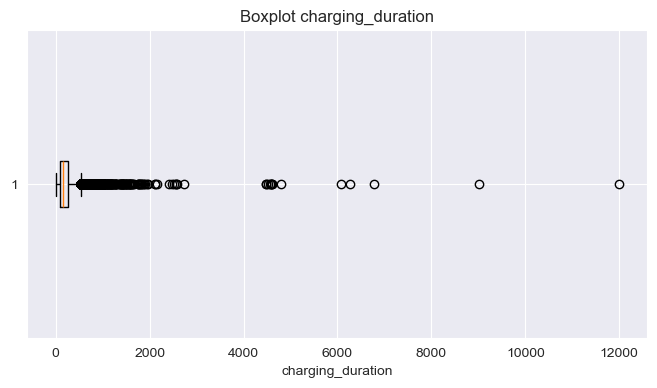

In [31]:
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['charging_duration'], vert=False, patch_artist=False)
plt.title("Boxplot charging_duration")
plt.xlabel("charging_duration")
plt.grid(True)

In [32]:
# Based on the boxplot above we decided that charging durations longer than 2880 minutes or 48 hours (which about matches the last record before the next at about ~4000) are outliers.
unrealistic_charging_duration = charging_data_cleaned[(charging_data_cleaned['charging_duration'] > 2880)]
print(f"Number of records where the charging duration is longer than 2880 minutes (48 hours): {unrealistic_charging_duration.shape[0]}")

Number of records where the charging duration is longer than 2880 minutes (48 hours): 14


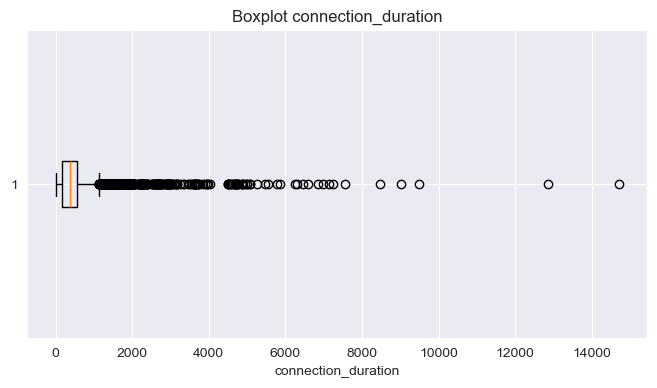

In [33]:
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['connection_duration'], vert=False, patch_artist=False)
plt.title("Boxplot connection_duration")
plt.xlabel("connection_duration")
#plt.xlim(0, 4000)
plt.grid(True)

In [34]:
# Based on the boxplot above and to match it to the unrealistic charging durations, we decided that connection durations longer than 2880 minutes or 48 hours are outliers.
unrealistic_connection_duration = charging_data_cleaned[(charging_data_cleaned['connection_duration'] > 2880)]
print(f"Number of records where the connection duration is longer than 2880 minutes (48 hours): {unrealistic_connection_duration.shape[0]}")

Number of records where the connection duration is longer than 2880 minutes (48 hours): 91


In [35]:
# In conclusion, we decided to drop the records where charging or connection duration is longer than 2880 minutes (48 hours).
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['charging_duration'] > 2880].index, inplace=True)
charging_data_cleaned.drop(charging_data_cleaned[charging_data_cleaned['connection_duration'] > 2880].index, inplace=True)

# Verify that the records have been deleted
unrealistic_charging_duration_counter = charging_data_cleaned[(charging_data_cleaned['charging_duration'] > 2880)].shape[0]
unrealistic_connection_duration_counter = charging_data_cleaned[(charging_data_cleaned['connection_duration'] > 2880)].shape[0]
print(f"Number of records where the charging duration is longer than 2880 minutes (48 hours): {unrealistic_charging_duration_counter}")
print(f"Number of records where the connection duration is longer than 2880 minutes (48 hours): {unrealistic_connection_duration_counter}")

Number of records where the charging duration is longer than 2880 minutes (48 hours): 0
Number of records where the connection duration is longer than 2880 minutes (48 hours): 0


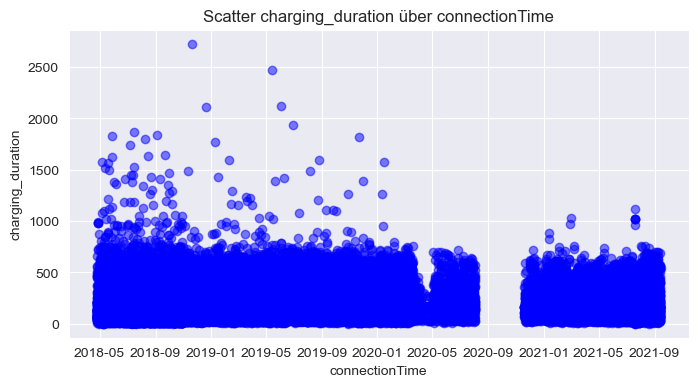

In [36]:
# Just for visual purpose
plt.figure(figsize=(8, 4))
plt.scatter(charging_data_cleaned['connectionTime'], charging_data_cleaned['charging_duration'], c='blue', alpha=0.5,
            label='charging_duration')
plt.title("Scatter charging_duration über connectionTime")
plt.xlabel("connectionTime")
plt.ylabel("charging_duration")
plt.grid(True)

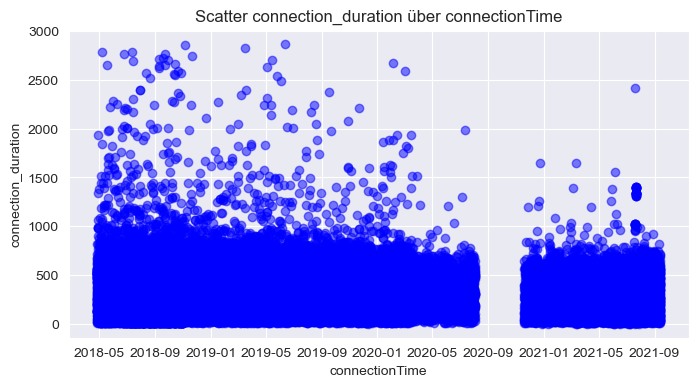

In [37]:
# Just for visual purpose
plt.figure(figsize=(8, 4))
plt.scatter(charging_data_cleaned['connectionTime'], charging_data_cleaned['connection_duration'], c='blue', alpha=0.5,
            label='connection_duration')
plt.title("Scatter connection_duration über connectionTime")
plt.xlabel("connectionTime")
plt.ylabel("connection_duration")
plt.grid(True)

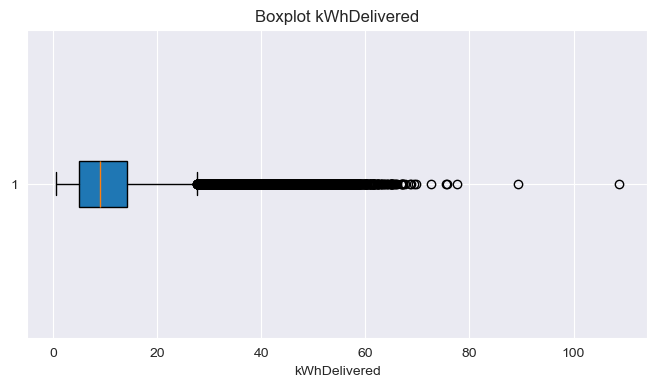

In [38]:
# The two records with kWhDelivered @ ~90 and @ ~ 110 visually look like outliers in the boxplot below, but we did some research about the capacity of batteries and came to the conclusion that these records are not necessarily outliers. So we keep them in our data set
plt.figure(figsize=(8, 4))
plt.boxplot(charging_data_cleaned['kWhDelivered'], vert=False, patch_artist=True)
plt.title("Boxplot kWhDelivered")
plt.xlabel("kWhDelivered")
plt.grid(True)

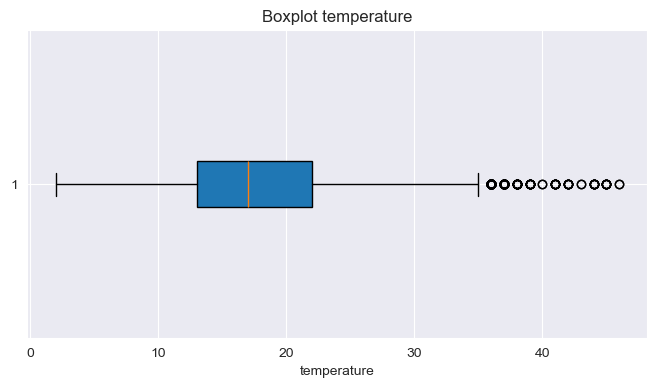

In [39]:
# The boxplot for the temperature doesn't show noticeable outliers, since temperatures of over 35 degrees are common in Los Angeles in the summer
plt.figure(figsize=(8, 4))
plt.boxplot(weather_data_cleaned['temperature'], vert=False, patch_artist=True)
plt.title("Boxplot temperature")
plt.xlabel("temperature")
plt.grid(True)


## 5 Inconsistencies
Correct missspelling and false dataTypes

Data is conistant after visual check. Final check can be done after data types are chaned...

In [40]:
#ToDo: Check missspelling etc., dataTypes have been done above -> TBD with final check...

## 5 Feature engineering
Add aditional features (e.g. charging or idle time) -> To be discussed


## 6 Final review
Look again for missing, errorous, and inconsistant data

In [41]:
# Missing data
print("Number of missing values in cleand charging data: " + str(charging_data_cleaned.isnull().sum().sum())) #17189 missing is correct (userIDs)
print("Number of missing values in cleand weather data: " + str(weather_data_cleaned.isnull().sum().sum()))

Number of missing values in cleand charging data: 0
Number of missing values in cleand weather data: 0


## 7 Export Cleaned Data



In [42]:
# Export Dataframes as pickle (.pkl) and csv (.csv) files
charging_data_cleaned.to_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned.to_pickle(os.path.join('Data', 'weather_data.pkl'))
charging_data_cleaned.to_csv(os.path.join('Data', 'charging_data.csv'))
weather_data_cleaned.to_csv(os.path.join('Data', 'weather_data.csv'))

In [43]:
# Export merged charging to weather data dataset
# Sort both datasets by their respective timestamps
charging_data_cleaned = charging_data_cleaned.sort_values(by='connectionTime')
weather_data_cleaned = weather_data_cleaned.sort_values(by='timestamp')

# Perform a nearest merge to align weather data to charging data
merged_data = pd.merge_asof(
    charging_data_cleaned,
    weather_data_cleaned,
    left_on='connectionTime',  # The timestamp in charging data
    right_on='timestamp',      # The timestamp in weather data
    direction='backward'       # Align with the closest earlier weather record
)

# Since we found out at the beginning, that the weather data only goes until 01-01-2021 and the charging data records after 01-01-2021 would all be joined to this weather record which would make no sense, we decided to drop all records after 01-01-2021 from the merged dataset.
merged_data = merged_data[merged_data['connectionTime'] < '2021-01-02']

# Save the merged dataset to a pickle (.pkl) and csv (.csv) file
merged_data.to_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))
merged_data.to_csv(os.path.join('Data', 'merged_charging_weather_data.csv'))